In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier

df = pd.read_csv("../creditcard.csv")
df = df.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:5000]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
fraud_data = normal_distributed_df.sample(frac=1, random_state=42)


data = fraud_data.loc[:, fraud_data.columns != 'Class'] 
target = fraud_data.loc[:, fraud_data.columns == 'Class'] 
#print list(fraud_data)

# train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# clf.fit(train_data, train_target)
# clf.score(test_data,test_target)

In [3]:
# NUM_TIMS_TO_RUN=10

# classification__activation= ['identity', 'logistic', 'tanh', 'relu']
# sum_test_accuracy_list=np.array([0,0])
# sum_train_accuracy_list=np.array([0,0])
# train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)

# for j in range(NUM_TIMS_TO_RUN):
#     test_accuracy_list=[]
#     train_accuracy_list = []
#     counter=0
#     for i in classification__activation:
#         clf =  MLPClassifier(activation=i)
#         #Fit train Data and test against test data
#         clf.fit(train_data, train_target)
#         test_accuracy_list.append([counter,clf.score(test_data,test_target)])
#         #print test_accuracy_list
#         #Ftest against training data
#         train_accuracy_list.append([counter,clf.score(train_data,train_target)])
#         counter=counter+1

    
#     sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

# avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
# #print avg_test_prediction, avg_train_prediction

# plt.xlabel('Activation')
# plt.ylabel('Accuracy')
# plt.ylim((.6,1))
# my_xticks = classification__activation
# plt.xticks(avg_test_prediction[:,0],my_xticks)
# plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
# plt.title('Accuracy vs Activation')
# plt.legend()
# plt.show()

In [4]:
# plt.xlabel('Activation')
# plt.ylabel('Accuracy')
# plt.ylim((.6,1))
# my_xticks = classification__activation
# plt.xticks(avg_test_prediction[:,0],my_xticks)
# plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
# plt.title('Accuracy vs Activation')
# plt.legend()
# plt.show()

In [5]:
# NUM_TIMS_TO_RUN=10

# classification__solver= ['lbfgs', 'sgd', 'adam']
# sum_test_accuracy_list=np.array([0,0])
# sum_train_accuracy_list=np.array([0,0])

# for j in range(NUM_TIMS_TO_RUN):
#     test_accuracy_list=[]
#     train_accuracy_list = []
#     counter=0
#     for i in classification__solver:
#         clf =  MLPClassifier(solver=i)
#         train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
#         #Fit train Data and test against test data
#         clf.fit(train_data, train_target)
#         test_accuracy_list.append([counter,clf.score(test_data,test_target)])
#         #print test_accuracy_list
#         #Ftest against training data
#         train_accuracy_list.append([counter,clf.score(train_data,train_target)])
#         counter=counter+1

    
#     sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

# avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
# #print avg_test_prediction, avg_train_prediction

# plt.xlabel('Solver')
# plt.ylabel('Accuracy')
# plt.ylim((.5,1))
# plt.xticks(avg_test_prediction[:,0],classification__solver)
# plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
# plt.title('Accuracy vs Solver')
# plt.legend()
# plt.show()

In [6]:
# NUM_TIMS_TO_RUN=10

# classification__alpha=[1e-4, 1e-3, 0.01, 0.1, 1]
# sum_test_accuracy_list=np.array([0,0])
# sum_train_accuracy_list=np.array([0,0])

# for j in range(NUM_TIMS_TO_RUN):
#     test_accuracy_list=[]
#     train_accuracy_list = []
#     counter=0
#     for i in classification__alpha:
#         clf =  MLPClassifier(alpha=i)
#         train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
#         #Fit train Data and test against test data
#         clf.fit(train_data, train_target)
#         test_accuracy_list.append([counter,clf.score(test_data,test_target)])
#         #print test_accuracy_list
#         #Ftest against training data
#         train_accuracy_list.append([counter,clf.score(train_data,train_target)])
#         counter=counter+1

    
#     sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

# avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
# avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
# #print avg_test_prediction, avg_train_prediction

# plt.xlabel('alpha')
# plt.ylabel('Accuracy')
# plt.ylim((.5,1))
# my_xticks = classification__alpha
# plt.xticks(avg_test_prediction[:,0],my_xticks)
# plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
# plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
# plt.title('Accuracy vs alpha')
# plt.legend()
# plt.show()

C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


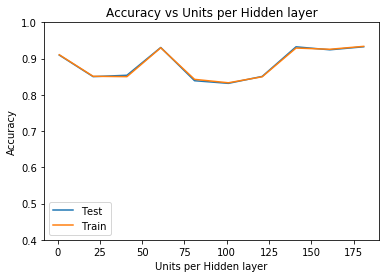

In [7]:
NUM_TIMS_TO_RUN=10
HIDDEN_LAYERS=500
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in range(1,201,20):
        clf =  MLPClassifier(hidden_layer_sizes=(i))
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        #print test_accuracy_list
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
        counter=counter+1

    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction

plt.xlabel('Units per Hidden layer')
plt.ylabel('Accuracy')
plt.ylim((.4,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Units per Hidden layer')
plt.legend()
plt.show()

[[   1.            0.90970874]
 [  21.            0.85024272]
 [  41.            0.85400485]
 [  61.            0.93070388]
 [  81.            0.83895631]
 [ 101.            0.83167476]
 [ 121.            0.85084951]
 [ 141.            0.93252427]
 [ 161.            0.92427184]
 [ 181.            0.93264563]] [[   1.            0.91056127]
 [  21.            0.85117823]
 [  41.            0.85017138]
 [  61.            0.92990574]
 [  81.            0.84273779]
 [ 101.            0.83324764]
 [ 121.            0.84989289]
 [ 141.            0.92915596]
 [ 161.            0.92572836]
 [ 181.            0.9337832 ]]


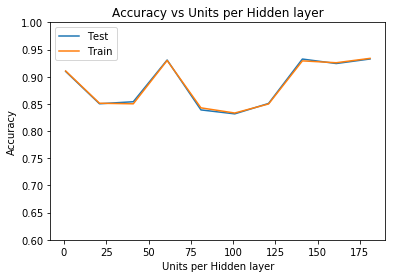

In [8]:
print avg_test_prediction, avg_train_prediction

plt.xlabel('Units per Hidden layer')
plt.ylabel('Accuracy')
plt.ylim((.6,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Units per Hidden layer')
plt.legend()
plt.show()

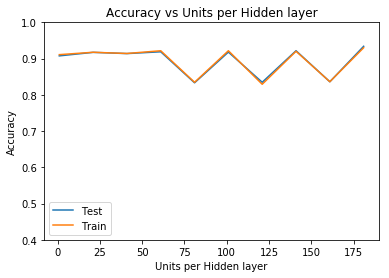

In [9]:
NUM_TIMS_TO_RUN=10
HIDDEN_LAYERS=200
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in range(1,201,20):
        clf =  MLPClassifier(hidden_layer_sizes=(i,i,i))
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        #print test_accuracy_list
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
        counter=counter+1

    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction

plt.xlabel('Units per Hidden layer')
plt.ylabel('Accuracy')
plt.ylim((.4,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Units per Hidden layer')
plt.legend()
plt.show()

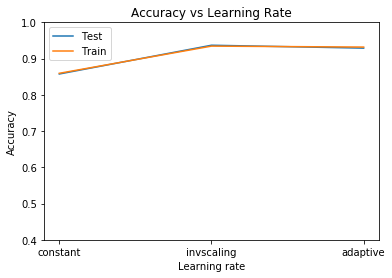

In [10]:
NUM_TIMS_TO_RUN=10
learning_rate= ['constant', 'invscaling', 'adaptive']
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in learning_rate:
        clf =  MLPClassifier(learning_rate=i)
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([counter,clf.score(test_data,test_target)])
        #print test_accuracy_list
        #Ftest against training data
        train_accuracy_list.append([counter,clf.score(train_data,train_target)])
        counter=counter+1

    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction

plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.ylim((.4,1))
plt.xticks(avg_test_prediction[:,0],learning_rate)

plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Learning Rate')
plt.legend()
plt.show()

[[ 0.          0.85752427]
 [ 1.          0.9368932 ]
 [ 2.          0.9288835 ]] [[ 0.          0.8594473 ]
 [ 1.          0.9344473 ]
 [ 2.          0.93181234]]


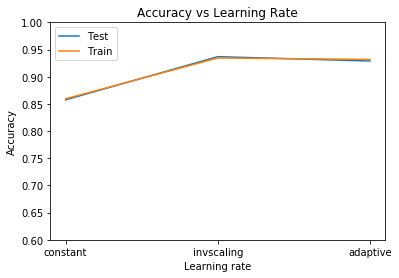

In [11]:
print avg_test_prediction, avg_train_prediction

plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.ylim((.6,1))
plt.xticks(avg_test_prediction[:,0],learning_rate)

plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Learning Rate')
plt.legend()
plt.show()

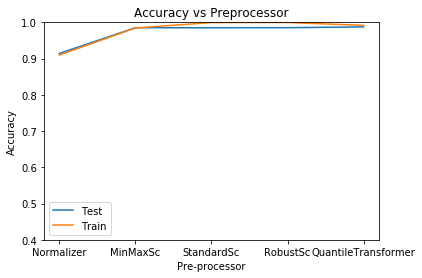

In [12]:
NUM_TIMS_TO_RUN=10
preprocess= [Normalizer(), MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in preprocess:
        scaler = i
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)

        scaler.fit(train_data)
        train_data = scaler.transform(train_data)
        test_data = scaler.transform(test_data) 
        
        clf =  MLPClassifier()
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([counter,clf.score(test_data,test_target)])
        #print test_accuracy_list
        #Ftest against training data
        train_accuracy_list.append([counter,clf.score(train_data,train_target)])
        counter=counter+1
    
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_test_prediction, avg_train_prediction

plt.xlabel('Pre-processor')
plt.ylabel('Accuracy')
plt.ylim((.4,1))
xticks= ['Normalizer', 'MinMaxSc', 'StandardSc', 'RobustSc', 'QuantileTransformer']

plt.xticks(avg_test_prediction[:,0],xticks)

plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Accuracy vs Preprocessor')
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict, validation_curve 
kfold = KFold(n_splits=10,random_state=7)
solver = MLPClassifier(activation='logistic', solver='sgd', alpha=1, hidden_layer_sizes=(140,))
cv_score_noPreProcess = cross_val_score(solver, data, target, cv = kfold)

scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
solver = MLPClassifier(activation='logistic', solver='sgd', alpha=1, hidden_layer_sizes=(140,))

cv_score_preprocess = cross_val_score(solver, data, target, cv = kfold)

print "10 Fold Cross Validation Score without pre-processor", cv_score_noPreProcess.mean()
print "10 Fold Cross Validation Score with Standard Scaler", cv_score_preprocess.mean()


scaler = StandardScaler()
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.15)

scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data) 

clf =  MLPClassifier()
#Fit train Data and test against test data
clf.fit(train_data, train_target)
print "Test default hyperparms with Standard Scaler:", clf.score(test_data,test_target)
#print test_accuracy_list
#Ftest against training data
print "Train default hyperparms Standard Scaler:", clf.score(train_data,train_target)

clf = MLPClassifier(activation='logistic', solver='sgd', alpha=1, hidden_layer_sizes=(140,))
clf.fit(train_data, train_target)
print "Test best hyperParams with Standard Scaler:", clf.score(test_data,test_target)
#print test_accuracy_list
#Ftest against training data
print "Train best hyperParms with Standard Scaler:", clf.score(train_data,train_target)

10 Fold Cross Validation Score without pre-processor 0.910421592979
10 Fold Cross Validation Score with Standard Scaler 0.981247888723
Test default hyperparms with Standard Scaler: 0.984223300971
Train default hyperparms Standard Scaler: 0.998071979434
Test best hyperParams with Standard Scaler: 0.984223300971
Train best hyperParms with Standard Scaler: 0.980719794344


In [2]:
NUM_TIMS_TO_RUN=1
TRAIN_SIZE=10
sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])
for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    for i in range(1, TRAIN_SIZE):
        scaler = StandardScaler()
        #print i/100.0
        train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1-i/10.0)
        scaler.fit(train_data)
        train_data = scaler.transform(train_data)
        test_data = scaler.transform(test_data)                 
        clf = MLPClassifier(activation='relu', solver='adam')
        #clf = tree.DecisionTreeClassifier()
        clf.fit(train_data, train_target)
        #Fit train Data and test against test data
        clf.fit(train_data, train_target)
        test_accuracy_list.append([i,clf.score(test_data,test_target)])
        #Ftest against training data
        train_accuracy_list.append([i,clf.score(train_data,train_target)])
    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print avg_train_prediction, avg_test_prediction
plt.xlabel('Training Size in percentage')
plt.ylabel('Accuracy')
plt.ylim((0.8,1))
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Tree accuracy vs Training Size percentage')
plt.legend()
plt.show()

C:\Users\rosha\Anaconda2\envs\skLearn\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 